In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [26]:
DATA_PATH = 'C:\\Users\\배진우\\Documents\\multiCampus_TA\\python_data\\'

# 저장된 mnist 데이터를 읽어온다.
with open(DATA_PATH + 'santander_train.csv') as f:
    cust_df = pd.read_csv(f)


In [27]:
cust_df

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


In [28]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [29]:
print(cust_df['TARGET'].value_counts())
unstisfied_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print(f'불만족 비율: {np.round((unstisfied_cnt/total_cnt*100), 2)}%')

0    73012
1     3008
Name: TARGET, dtype: int64
불만족 비율: 3.96%


In [30]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [31]:
cust_df['var3'].value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: var3, Length: 208, dtype: int64

In [32]:
cust_df['var3'].replace(-999999, 2, inplace = True)
cust_df.drop('ID', axis = 1, inplace = True)
cust_df

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


In [45]:
cust_df.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,2.716483,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,9.447971,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,8237.820000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [34]:
# 피처 세트와 레이블 세트 분리. 레이블 칼럼은 DataFrame의 맨 마지막에 위치해 칼럼 위치 -1로 분리
X_feature = cust_df.iloc[: , :-1]
y_label = cust_df.iloc[:,-1]
print(f'피처 데이터 shape: {X_feature.shape}')

피처 데이터 shape: (76020, 369)


In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X_feature, y_label, test_size = 0.2, random_state = 12)
xgb_clf = XGBClassifier(n_estimators = 100, random_state = 123)
xgb_clf.fit(X_train, Y_train, early_stopping_rounds = 100,eval_metric ='auc', eval_set = [(X_test, Y_test)])

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82760
[1]	validation_0-auc:0.83537
[2]	validation_0-auc:0.83725
[3]	validation_0-auc:0.83865
[4]	validation_0-auc:0.83987
[5]	validation_0-auc:0.84164
[6]	validation_0-auc:0.84407
[7]	validation_0-auc:0.84542
[8]	validation_0-auc:0.84580
[9]	validation_0-auc:0.84757
[10]	validation_0-auc:0.84703
[11]	validation_0-auc:0.84652
[12]	validation_0-auc:0.84593
[13]	validation_0-auc:0.84737
[14]	validation_0-auc:0.84732
[15]	validation_0-auc:0.84773
[16]	validation_0-auc:0.84755
[17]	validation_0-auc:0.84815
[18]	validation_0-auc:0.84761
[19]	validation_0-auc:0.84779
[20]	validation_0-auc:0.84732
[21]	validation_0-auc:0.84766
[22]	validation_0-auc:0.84765
[23]	validation_0-auc:0.84806
[24]	validation_0-auc:0.84778
[25]	validation_0-auc:0.84758
[26]	validation_0-auc:0.84756
[27]	validation_0-auc:0.84764
[28]	validation_0-auc:0.84720
[29]	validation_0-auc:0.84704
[30]	validation_0-auc:0.84757
[31]	validation_0-auc:0.84739
[32]	validation_0-auc:0.84703
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기위해 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth': [5, 7],
         'min_child_weight': [1, 3],
         'colsample_bytree': [0.5, 0.75]}
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, Y_train, early_stopping_rounds=30, eval_metric="auc", eval_set=[(X_train, Y_train), (X_test, Y_test)])

print(f'GridSearchCV 최적 파라미터: {gridcv.best_params_}')

xgb_roc_score = roc_auc_score(Y_test, gridcv.predict_proba(X_test)[:, 1], average='macro')
print(f'ROC AUC: {np.round(xgb_roc_score, 4)}')

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79298	validation_1-auc:0.80491
[1]	validation_0-auc:0.81701	validation_1-auc:0.82578
[2]	validation_0-auc:0.82553	validation_1-auc:0.83138
[3]	validation_0-auc:0.83068	validation_1-auc:0.83437
[4]	validation_0-auc:0.83442	validation_1-auc:0.83762
[5]	validation_0-auc:0.83642	validation_1-auc:0.83661
[6]	validation_0-auc:0.83735	validation_1-auc:0.83272
[7]	validation_0-auc:0.84316	validation_1-auc:0.83886
[8]	validation_0-auc:0.84550	validation_1-auc:0.83997
[9]	validation_0-auc:0.84653	validation_1-auc:0.83655
[10]	validation_0-auc:0.84513	validation_1-auc:0.83182
[11]	validation_0-auc:0.84521	validation_1-auc:0.83010
[12]	validation_0-auc:0.85111	validation_1-auc:0.83657
[13]	validation_0-auc:0.85457	validation_1-auc:0.83983
[14]	validation_0-auc:0.85737	validation_1-auc:0.84293
[15]	validation_0-auc:0.85797	validation_1-auc:0.84231
[16]	validation_0-auc:0.86010	validation_1-auc:0.84357
[17]	validation_0-auc:0.86135	validation_1-auc:0.84467
[18]	validation_0-au

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80063	validation_1-auc:0.81090
[1]	validation_0-auc:0.81306	validation_1-auc:0.81795
[2]	validation_0-auc:0.82398	validation_1-auc:0.83235
[3]	validation_0-auc:0.82505	validation_1-auc:0.83257
[4]	validation_0-auc:0.82913	validation_1-auc:0.83565
[5]	validation_0-auc:0.83249	validation_1-auc:0.83398
[6]	validation_0-auc:0.83358	validation_1-auc:0.82772
[7]	validation_0-auc:0.84080	validation_1-auc:0.83537
[8]	validation_0-auc:0.84565	validation_1-auc:0.83894
[9]	validation_0-auc:0.84532	validation_1-auc:0.83585
[10]	validation_0-auc:0.84526	validation_1-auc:0.83125
[11]	validation_0-auc:0.84585	validation_1-auc:0.82978
[12]	validation_0-auc:0.85139	validation_1-auc:0.83728
[13]	validation_0-auc:0.85482	validation_1-auc:0.84138
[14]	validation_0-auc:0.85625	validation_1-auc:0.84384
[15]	validation_0-auc:0.85703	validation_1-auc:0.84308
[16]	validation_0-auc:0.85882	validation_1-auc:0.84409
[17]	validation_0-auc:0.86057	validation_1-auc:0.84469
[18]	validation_0-au

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80373	validation_1-auc:0.81572
[1]	validation_0-auc:0.81837	validation_1-auc:0.82514
[2]	validation_0-auc:0.82857	validation_1-auc:0.83160
[3]	validation_0-auc:0.83168	validation_1-auc:0.83441
[4]	validation_0-auc:0.83692	validation_1-auc:0.83628
[5]	validation_0-auc:0.83948	validation_1-auc:0.83806
[6]	validation_0-auc:0.83871	validation_1-auc:0.83401
[7]	validation_0-auc:0.84301	validation_1-auc:0.83767
[8]	validation_0-auc:0.84631	validation_1-auc:0.84111
[9]	validation_0-auc:0.84607	validation_1-auc:0.83806
[10]	validation_0-auc:0.84484	validation_1-auc:0.83247
[11]	validation_0-auc:0.84529	validation_1-auc:0.83063
[12]	validation_0-auc:0.85088	validation_1-auc:0.83896
[13]	validation_0-auc:0.85462	validation_1-auc:0.84323
[14]	validation_0-auc:0.85675	validation_1-auc:0.84579
[15]	validation_0-auc:0.85781	validation_1-auc:0.84546
[16]	validation_0-auc:0.85934	validation_1-auc:0.84668
[17]	validation_0-auc:0.86069	validation_1-auc:0.84767
[18]	validation_0-au

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79172	validation_1-auc:0.80537
[1]	validation_0-auc:0.81647	validation_1-auc:0.82657
[2]	validation_0-auc:0.82693	validation_1-auc:0.83130
[3]	validation_0-auc:0.83055	validation_1-auc:0.83449
[4]	validation_0-auc:0.83420	validation_1-auc:0.83646
[5]	validation_0-auc:0.83513	validation_1-auc:0.83500
[6]	validation_0-auc:0.83631	validation_1-auc:0.83071
[7]	validation_0-auc:0.84265	validation_1-auc:0.83678
[8]	validation_0-auc:0.84629	validation_1-auc:0.83915
[9]	validation_0-auc:0.84686	validation_1-auc:0.83439
[10]	validation_0-auc:0.84505	validation_1-auc:0.82984
[11]	validation_0-auc:0.84469	validation_1-auc:0.82835
[12]	validation_0-auc:0.84980	validation_1-auc:0.83563
[13]	validation_0-auc:0.85375	validation_1-auc:0.83898
[14]	validation_0-auc:0.85573	validation_1-auc:0.84167
[15]	validation_0-auc:0.85642	validation_1-auc:0.84008
[16]	validation_0-auc:0.85811	validation_1-auc:0.84171
[17]	validation_0-auc:0.85967	validation_1-auc:0.84414
[18]	validation_0-au

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80051	validation_1-auc:0.81106
[1]	validation_0-auc:0.81351	validation_1-auc:0.81824
[2]	validation_0-auc:0.82405	validation_1-auc:0.83321
[3]	validation_0-auc:0.82774	validation_1-auc:0.83326
[4]	validation_0-auc:0.83116	validation_1-auc:0.83743
[5]	validation_0-auc:0.83315	validation_1-auc:0.83510
[6]	validation_0-auc:0.83378	validation_1-auc:0.82780
[7]	validation_0-auc:0.84132	validation_1-auc:0.83542
[8]	validation_0-auc:0.84603	validation_1-auc:0.83964
[9]	validation_0-auc:0.84561	validation_1-auc:0.83641
[10]	validation_0-auc:0.84559	validation_1-auc:0.83105
[11]	validation_0-auc:0.84557	validation_1-auc:0.83106
[12]	validation_0-auc:0.85092	validation_1-auc:0.83813
[13]	validation_0-auc:0.85369	validation_1-auc:0.84108
[14]	validation_0-auc:0.85539	validation_1-auc:0.84396
[15]	validation_0-auc:0.85552	validation_1-auc:0.84344
[16]	validation_0-auc:0.85696	validation_1-auc:0.84494
[17]	validation_0-auc:0.85810	validation_1-auc:0.84618
[18]	validation_0-au

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80247	validation_1-auc:0.81674
[1]	validation_0-auc:0.81723	validation_1-auc:0.82577
[2]	validation_0-auc:0.82722	validation_1-auc:0.83384
[3]	validation_0-auc:0.83008	validation_1-auc:0.83517
[4]	validation_0-auc:0.83531	validation_1-auc:0.83761
[5]	validation_0-auc:0.83890	validation_1-auc:0.83828
[6]	validation_0-auc:0.83787	validation_1-auc:0.83428
[7]	validation_0-auc:0.84254	validation_1-auc:0.83825
[8]	validation_0-auc:0.84567	validation_1-auc:0.84147
[9]	validation_0-auc:0.84526	validation_1-auc:0.83879
[10]	validation_0-auc:0.84415	validation_1-auc:0.83392
[11]	validation_0-auc:0.84538	validation_1-auc:0.83176
[12]	validation_0-auc:0.85131	validation_1-auc:0.83901
[13]	validation_0-auc:0.85379	validation_1-auc:0.84440
[14]	validation_0-auc:0.85575	validation_1-auc:0.84635
[15]	validation_0-auc:0.85647	validation_1-auc:0.84555
[16]	validation_0-auc:0.85835	validation_1-auc:0.84784
[17]	validation_0-auc:0.85987	validation_1-auc:0.84913
[18]	validation_0-au

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80895	validation_1-auc:0.81565
[1]	validation_0-auc:0.83104	validation_1-auc:0.83218
[2]	validation_0-auc:0.83729	validation_1-auc:0.83244
[3]	validation_0-auc:0.83964	validation_1-auc:0.83494
[4]	validation_0-auc:0.84507	validation_1-auc:0.83528
[5]	validation_0-auc:0.84711	validation_1-auc:0.83291
[6]	validation_0-auc:0.84930	validation_1-auc:0.83007
[7]	validation_0-auc:0.85700	validation_1-auc:0.83625
[8]	validation_0-auc:0.86118	validation_1-auc:0.83741
[9]	validation_0-auc:0.86255	validation_1-auc:0.83390
[10]	validation_0-auc:0.86320	validation_1-auc:0.83208
[11]	validation_0-auc:0.86390	validation_1-auc:0.82903
[12]	validation_0-auc:0.87025	validation_1-auc:0.83597
[13]	validation_0-auc:0.87540	validation_1-auc:0.83854
[14]	validation_0-auc:0.87727	validation_1-auc:0.84109
[15]	validation_0-auc:0.87832	validation_1-auc:0.83978
[16]	validation_0-auc:0.88023	validation_1-auc:0.84120
[17]	validation_0-auc:0.88207	validation_1-auc:0.84425
[18]	validation_0-au

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81369	validation_1-auc:0.82138
[1]	validation_0-auc:0.82607	validation_1-auc:0.82962
[2]	validation_0-auc:0.83310	validation_1-auc:0.83256
[3]	validation_0-auc:0.83523	validation_1-auc:0.83458
[4]	validation_0-auc:0.84223	validation_1-auc:0.83686
[5]	validation_0-auc:0.84416	validation_1-auc:0.83544
[6]	validation_0-auc:0.84471	validation_1-auc:0.82781
[7]	validation_0-auc:0.85322	validation_1-auc:0.83593
[8]	validation_0-auc:0.85977	validation_1-auc:0.83845
[9]	validation_0-auc:0.86011	validation_1-auc:0.83533
[10]	validation_0-auc:0.85920	validation_1-auc:0.83149
[11]	validation_0-auc:0.86027	validation_1-auc:0.82788
[12]	validation_0-auc:0.86689	validation_1-auc:0.83468
[13]	validation_0-auc:0.87105	validation_1-auc:0.83929
[14]	validation_0-auc:0.87339	validation_1-auc:0.84090
[15]	validation_0-auc:0.87482	validation_1-auc:0.84031
[16]	validation_0-auc:0.87628	validation_1-auc:0.84221
[17]	validation_0-auc:0.87797	validation_1-auc:0.84385
[18]	validation_0-au

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81145	validation_1-auc:0.81868
[1]	validation_0-auc:0.82857	validation_1-auc:0.82993
[2]	validation_0-auc:0.83657	validation_1-auc:0.83389
[3]	validation_0-auc:0.84183	validation_1-auc:0.83698
[4]	validation_0-auc:0.84816	validation_1-auc:0.84269
[5]	validation_0-auc:0.85060	validation_1-auc:0.83810
[6]	validation_0-auc:0.85090	validation_1-auc:0.83290
[7]	validation_0-auc:0.85639	validation_1-auc:0.83839
[8]	validation_0-auc:0.86212	validation_1-auc:0.84118
[9]	validation_0-auc:0.86253	validation_1-auc:0.83920
[10]	validation_0-auc:0.86338	validation_1-auc:0.83582
[11]	validation_0-auc:0.86366	validation_1-auc:0.83379
[12]	validation_0-auc:0.87002	validation_1-auc:0.84165
[13]	validation_0-auc:0.87401	validation_1-auc:0.84605
[14]	validation_0-auc:0.87574	validation_1-auc:0.84821
[15]	validation_0-auc:0.87789	validation_1-auc:0.84735
[16]	validation_0-auc:0.88098	validation_1-auc:0.84943
[17]	validation_0-auc:0.88343	validation_1-auc:0.85027
[18]	validation_0-au

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80724	validation_1-auc:0.81676
[1]	validation_0-auc:0.82977	validation_1-auc:0.83270
[2]	validation_0-auc:0.83855	validation_1-auc:0.83460
[3]	validation_0-auc:0.84033	validation_1-auc:0.83648
[4]	validation_0-auc:0.84516	validation_1-auc:0.84062
[5]	validation_0-auc:0.84631	validation_1-auc:0.83542
[6]	validation_0-auc:0.84699	validation_1-auc:0.83096
[7]	validation_0-auc:0.85457	validation_1-auc:0.83763
[8]	validation_0-auc:0.85976	validation_1-auc:0.84074
[9]	validation_0-auc:0.86004	validation_1-auc:0.83788
[10]	validation_0-auc:0.85918	validation_1-auc:0.83493
[11]	validation_0-auc:0.86023	validation_1-auc:0.83296
[12]	validation_0-auc:0.86564	validation_1-auc:0.83818
[13]	validation_0-auc:0.87062	validation_1-auc:0.84141
[14]	validation_0-auc:0.87258	validation_1-auc:0.84254
[15]	validation_0-auc:0.87409	validation_1-auc:0.84177
[16]	validation_0-auc:0.87578	validation_1-auc:0.84333
[17]	validation_0-auc:0.87752	validation_1-auc:0.84597
[18]	validation_0-au

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81275	validation_1-auc:0.82078
[1]	validation_0-auc:0.82542	validation_1-auc:0.82988
[2]	validation_0-auc:0.83252	validation_1-auc:0.83144
[3]	validation_0-auc:0.83627	validation_1-auc:0.83469
[4]	validation_0-auc:0.84237	validation_1-auc:0.83791
[5]	validation_0-auc:0.84559	validation_1-auc:0.83637
[6]	validation_0-auc:0.84597	validation_1-auc:0.82739
[7]	validation_0-auc:0.85510	validation_1-auc:0.83519
[8]	validation_0-auc:0.85893	validation_1-auc:0.83748
[9]	validation_0-auc:0.85808	validation_1-auc:0.83580
[10]	validation_0-auc:0.85828	validation_1-auc:0.83084
[11]	validation_0-auc:0.85820	validation_1-auc:0.82841
[12]	validation_0-auc:0.86365	validation_1-auc:0.83760
[13]	validation_0-auc:0.86729	validation_1-auc:0.84209
[14]	validation_0-auc:0.86840	validation_1-auc:0.84337
[15]	validation_0-auc:0.86903	validation_1-auc:0.84317
[16]	validation_0-auc:0.87117	validation_1-auc:0.84397
[17]	validation_0-auc:0.87309	validation_1-auc:0.84548
[18]	validation_0-au

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81077	validation_1-auc:0.82000
[1]	validation_0-auc:0.82680	validation_1-auc:0.83126
[2]	validation_0-auc:0.83472	validation_1-auc:0.83472
[3]	validation_0-auc:0.83879	validation_1-auc:0.83466
[4]	validation_0-auc:0.84617	validation_1-auc:0.83995
[5]	validation_0-auc:0.84837	validation_1-auc:0.83983
[6]	validation_0-auc:0.84863	validation_1-auc:0.83276
[7]	validation_0-auc:0.85513	validation_1-auc:0.83628
[8]	validation_0-auc:0.86038	validation_1-auc:0.84062
[9]	validation_0-auc:0.86013	validation_1-auc:0.83713
[10]	validation_0-auc:0.86069	validation_1-auc:0.83414
[11]	validation_0-auc:0.86056	validation_1-auc:0.83157
[12]	validation_0-auc:0.86557	validation_1-auc:0.83747
[13]	validation_0-auc:0.86975	validation_1-auc:0.84266
[14]	validation_0-auc:0.87136	validation_1-auc:0.84516
[15]	validation_0-auc:0.87255	validation_1-auc:0.84423
[16]	validation_0-auc:0.87468	validation_1-auc:0.84662
[17]	validation_0-auc:0.87632	validation_1-auc:0.84840
[18]	validation_0-au

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80745	validation_1-auc:0.81541
[1]	validation_0-auc:0.81766	validation_1-auc:0.82160
[2]	validation_0-auc:0.82921	validation_1-auc:0.83332
[3]	validation_0-auc:0.83229	validation_1-auc:0.83267
[4]	validation_0-auc:0.83447	validation_1-auc:0.83425
[5]	validation_0-auc:0.83703	validation_1-auc:0.83722
[6]	validation_0-auc:0.83852	validation_1-auc:0.83792
[7]	validation_0-auc:0.84330	validation_1-auc:0.84158
[8]	validation_0-auc:0.84544	validation_1-auc:0.84134
[9]	validation_0-auc:0.84837	validation_1-auc:0.84201
[10]	validation_0-auc:0.85051	validation_1-auc:0.83942
[11]	validation_0-auc:0.85041	validation_1-auc:0.83796
[12]	validation_0-auc:0.85397	validation_1-auc:0.84146
[13]	validation_0-auc:0.85565	validation_1-auc:0.84230
[14]	validation_0-auc:0.85761	validation_1-auc:0.84411
[15]	validation_0-auc:0.85925	validation_1-auc:0.84512
[16]	validation_0-auc:0.86095	validation_1-auc:0.84646
[17]	validation_0-auc:0.86198	validation_1-auc:0.84691
[18]	validation_0-au

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80778	validation_1-auc:0.81388
[1]	validation_0-auc:0.82125	validation_1-auc:0.82469
[2]	validation_0-auc:0.82574	validation_1-auc:0.82754
[3]	validation_0-auc:0.82554	validation_1-auc:0.83052
[4]	validation_0-auc:0.83022	validation_1-auc:0.83417
[5]	validation_0-auc:0.83690	validation_1-auc:0.83976
[6]	validation_0-auc:0.84096	validation_1-auc:0.84263
[7]	validation_0-auc:0.84369	validation_1-auc:0.84207
[8]	validation_0-auc:0.84591	validation_1-auc:0.84397
[9]	validation_0-auc:0.84937	validation_1-auc:0.84502
[10]	validation_0-auc:0.84870	validation_1-auc:0.84119
[11]	validation_0-auc:0.84891	validation_1-auc:0.83885
[12]	validation_0-auc:0.85351	validation_1-auc:0.84128
[13]	validation_0-auc:0.85611	validation_1-auc:0.84360
[14]	validation_0-auc:0.85743	validation_1-auc:0.84554
[15]	validation_0-auc:0.85846	validation_1-auc:0.84663
[16]	validation_0-auc:0.85996	validation_1-auc:0.84856
[17]	validation_0-auc:0.86133	validation_1-auc:0.84823
[18]	validation_0-au

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81350	validation_1-auc:0.82177
[1]	validation_0-auc:0.82408	validation_1-auc:0.82694
[2]	validation_0-auc:0.82765	validation_1-auc:0.83189
[3]	validation_0-auc:0.83310	validation_1-auc:0.83525
[4]	validation_0-auc:0.83491	validation_1-auc:0.83731
[5]	validation_0-auc:0.83716	validation_1-auc:0.83753
[6]	validation_0-auc:0.83895	validation_1-auc:0.83825
[7]	validation_0-auc:0.84238	validation_1-auc:0.84165
[8]	validation_0-auc:0.84539	validation_1-auc:0.84340
[9]	validation_0-auc:0.84793	validation_1-auc:0.84100
[10]	validation_0-auc:0.84865	validation_1-auc:0.83715
[11]	validation_0-auc:0.84940	validation_1-auc:0.83634
[12]	validation_0-auc:0.85343	validation_1-auc:0.84072
[13]	validation_0-auc:0.85620	validation_1-auc:0.84351
[14]	validation_0-auc:0.85852	validation_1-auc:0.84586
[15]	validation_0-auc:0.85999	validation_1-auc:0.84630
[16]	validation_0-auc:0.86120	validation_1-auc:0.84739
[17]	validation_0-auc:0.86205	validation_1-auc:0.84769
[18]	validation_0-au

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81006	validation_1-auc:0.81157
[1]	validation_0-auc:0.82319	validation_1-auc:0.82901
[2]	validation_0-auc:0.82894	validation_1-auc:0.83173
[3]	validation_0-auc:0.83090	validation_1-auc:0.83118
[4]	validation_0-auc:0.83371	validation_1-auc:0.83443
[5]	validation_0-auc:0.83921	validation_1-auc:0.84071
[6]	validation_0-auc:0.83966	validation_1-auc:0.84148
[7]	validation_0-auc:0.84220	validation_1-auc:0.84123
[8]	validation_0-auc:0.84511	validation_1-auc:0.84203
[9]	validation_0-auc:0.84651	validation_1-auc:0.84173
[10]	validation_0-auc:0.84764	validation_1-auc:0.83978
[11]	validation_0-auc:0.84732	validation_1-auc:0.83511
[12]	validation_0-auc:0.85073	validation_1-auc:0.83855
[13]	validation_0-auc:0.85372	validation_1-auc:0.84167
[14]	validation_0-auc:0.85501	validation_1-auc:0.84363
[15]	validation_0-auc:0.85611	validation_1-auc:0.84456
[16]	validation_0-auc:0.85750	validation_1-auc:0.84559
[17]	validation_0-auc:0.85821	validation_1-auc:0.84643
[18]	validation_0-au

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80790	validation_1-auc:0.81289
[1]	validation_0-auc:0.82150	validation_1-auc:0.82483
[2]	validation_0-auc:0.82968	validation_1-auc:0.83493
[3]	validation_0-auc:0.83117	validation_1-auc:0.83393
[4]	validation_0-auc:0.83143	validation_1-auc:0.83637
[5]	validation_0-auc:0.83581	validation_1-auc:0.84106
[6]	validation_0-auc:0.84155	validation_1-auc:0.84330
[7]	validation_0-auc:0.84399	validation_1-auc:0.84454
[8]	validation_0-auc:0.84665	validation_1-auc:0.84345
[9]	validation_0-auc:0.84953	validation_1-auc:0.84345
[10]	validation_0-auc:0.84922	validation_1-auc:0.84018
[11]	validation_0-auc:0.84835	validation_1-auc:0.83766
[12]	validation_0-auc:0.85296	validation_1-auc:0.84253
[13]	validation_0-auc:0.85536	validation_1-auc:0.84534
[14]	validation_0-auc:0.85623	validation_1-auc:0.84690
[15]	validation_0-auc:0.85707	validation_1-auc:0.84705
[16]	validation_0-auc:0.85861	validation_1-auc:0.84737
[17]	validation_0-auc:0.85952	validation_1-auc:0.84787
[18]	validation_0-au

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81240	validation_1-auc:0.82230
[1]	validation_0-auc:0.82493	validation_1-auc:0.82813
[2]	validation_0-auc:0.82838	validation_1-auc:0.83359
[3]	validation_0-auc:0.83308	validation_1-auc:0.83711
[4]	validation_0-auc:0.83540	validation_1-auc:0.83827
[5]	validation_0-auc:0.83899	validation_1-auc:0.83764
[6]	validation_0-auc:0.84139	validation_1-auc:0.84066
[7]	validation_0-auc:0.84344	validation_1-auc:0.84370
[8]	validation_0-auc:0.84595	validation_1-auc:0.84403
[9]	validation_0-auc:0.84826	validation_1-auc:0.84422
[10]	validation_0-auc:0.84995	validation_1-auc:0.84162
[11]	validation_0-auc:0.84997	validation_1-auc:0.83758
[12]	validation_0-auc:0.85382	validation_1-auc:0.84283
[13]	validation_0-auc:0.85626	validation_1-auc:0.84694
[14]	validation_0-auc:0.85758	validation_1-auc:0.84811
[15]	validation_0-auc:0.85890	validation_1-auc:0.84881
[16]	validation_0-auc:0.86021	validation_1-auc:0.84998
[17]	validation_0-auc:0.86108	validation_1-auc:0.84961
[18]	validation_0-au

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82203	validation_1-auc:0.82489
[1]	validation_0-auc:0.82986	validation_1-auc:0.82956
[2]	validation_0-auc:0.83576	validation_1-auc:0.83264
[3]	validation_0-auc:0.84062	validation_1-auc:0.83344
[4]	validation_0-auc:0.84580	validation_1-auc:0.83582
[5]	validation_0-auc:0.84929	validation_1-auc:0.83815
[6]	validation_0-auc:0.85313	validation_1-auc:0.84238
[7]	validation_0-auc:0.85663	validation_1-auc:0.84190
[8]	validation_0-auc:0.86163	validation_1-auc:0.84177
[9]	validation_0-auc:0.86375	validation_1-auc:0.83912
[10]	validation_0-auc:0.86693	validation_1-auc:0.83804
[11]	validation_0-auc:0.86759	validation_1-auc:0.83670
[12]	validation_0-auc:0.87236	validation_1-auc:0.83830
[13]	validation_0-auc:0.87594	validation_1-auc:0.84158
[14]	validation_0-auc:0.87826	validation_1-auc:0.84378
[15]	validation_0-auc:0.87976	validation_1-auc:0.84468
[16]	validation_0-auc:0.88140	validation_1-auc:0.84511
[17]	validation_0-auc:0.88231	validation_1-auc:0.84591
[18]	validation_0-au

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81176	validation_1-auc:0.81549
[1]	validation_0-auc:0.82738	validation_1-auc:0.82838
[2]	validation_0-auc:0.83325	validation_1-auc:0.83273
[3]	validation_0-auc:0.83727	validation_1-auc:0.83579
[4]	validation_0-auc:0.84121	validation_1-auc:0.83779
[5]	validation_0-auc:0.84442	validation_1-auc:0.83758
[6]	validation_0-auc:0.85300	validation_1-auc:0.84220
[7]	validation_0-auc:0.85850	validation_1-auc:0.84108
[8]	validation_0-auc:0.86206	validation_1-auc:0.84180
[9]	validation_0-auc:0.86545	validation_1-auc:0.83937
[10]	validation_0-auc:0.86673	validation_1-auc:0.83600
[11]	validation_0-auc:0.86700	validation_1-auc:0.83446
[12]	validation_0-auc:0.87189	validation_1-auc:0.83809
[13]	validation_0-auc:0.87574	validation_1-auc:0.84033
[14]	validation_0-auc:0.87757	validation_1-auc:0.84359
[15]	validation_0-auc:0.88024	validation_1-auc:0.84384
[16]	validation_0-auc:0.88195	validation_1-auc:0.84447
[17]	validation_0-auc:0.88312	validation_1-auc:0.84489
[18]	validation_0-au

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81726	validation_1-auc:0.82297
[1]	validation_0-auc:0.83125	validation_1-auc:0.83061
[2]	validation_0-auc:0.83707	validation_1-auc:0.83524
[3]	validation_0-auc:0.84415	validation_1-auc:0.83703
[4]	validation_0-auc:0.84660	validation_1-auc:0.83929
[5]	validation_0-auc:0.85177	validation_1-auc:0.83991
[6]	validation_0-auc:0.85514	validation_1-auc:0.84196
[7]	validation_0-auc:0.85823	validation_1-auc:0.84381
[8]	validation_0-auc:0.86139	validation_1-auc:0.84408
[9]	validation_0-auc:0.86509	validation_1-auc:0.84524
[10]	validation_0-auc:0.86608	validation_1-auc:0.84410
[11]	validation_0-auc:0.86567	validation_1-auc:0.84205
[12]	validation_0-auc:0.87123	validation_1-auc:0.84621
[13]	validation_0-auc:0.87503	validation_1-auc:0.84928
[14]	validation_0-auc:0.87770	validation_1-auc:0.85116
[15]	validation_0-auc:0.88063	validation_1-auc:0.85195
[16]	validation_0-auc:0.88254	validation_1-auc:0.85216
[17]	validation_0-auc:0.88401	validation_1-auc:0.85211
[18]	validation_0-au

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82228	validation_1-auc:0.82544
[1]	validation_0-auc:0.82941	validation_1-auc:0.82922
[2]	validation_0-auc:0.83677	validation_1-auc:0.83306
[3]	validation_0-auc:0.84103	validation_1-auc:0.83559
[4]	validation_0-auc:0.84537	validation_1-auc:0.83668
[5]	validation_0-auc:0.84892	validation_1-auc:0.83759
[6]	validation_0-auc:0.85190	validation_1-auc:0.83877
[7]	validation_0-auc:0.85594	validation_1-auc:0.83971
[8]	validation_0-auc:0.85900	validation_1-auc:0.83940
[9]	validation_0-auc:0.86092	validation_1-auc:0.83805
[10]	validation_0-auc:0.86229	validation_1-auc:0.83384
[11]	validation_0-auc:0.86245	validation_1-auc:0.82930
[12]	validation_0-auc:0.86766	validation_1-auc:0.83229
[13]	validation_0-auc:0.87158	validation_1-auc:0.83771
[14]	validation_0-auc:0.87450	validation_1-auc:0.83955
[15]	validation_0-auc:0.87598	validation_1-auc:0.84098
[16]	validation_0-auc:0.87761	validation_1-auc:0.84187
[17]	validation_0-auc:0.87867	validation_1-auc:0.84309
[18]	validation_0-au

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81176	validation_1-auc:0.81564
[1]	validation_0-auc:0.82500	validation_1-auc:0.82555
[2]	validation_0-auc:0.83270	validation_1-auc:0.83237
[3]	validation_0-auc:0.83798	validation_1-auc:0.83561
[4]	validation_0-auc:0.84301	validation_1-auc:0.83821
[5]	validation_0-auc:0.84622	validation_1-auc:0.84124
[6]	validation_0-auc:0.85167	validation_1-auc:0.84222
[7]	validation_0-auc:0.85680	validation_1-auc:0.84227
[8]	validation_0-auc:0.85917	validation_1-auc:0.84508
[9]	validation_0-auc:0.86218	validation_1-auc:0.84269
[10]	validation_0-auc:0.86381	validation_1-auc:0.83895
[11]	validation_0-auc:0.86398	validation_1-auc:0.83676
[12]	validation_0-auc:0.86846	validation_1-auc:0.83814
[13]	validation_0-auc:0.87172	validation_1-auc:0.84103
[14]	validation_0-auc:0.87337	validation_1-auc:0.84340
[15]	validation_0-auc:0.87450	validation_1-auc:0.84372
[16]	validation_0-auc:0.87571	validation_1-auc:0.84416
[17]	validation_0-auc:0.87666	validation_1-auc:0.84479
[18]	validation_0-au

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81495	validation_1-auc:0.82399
[1]	validation_0-auc:0.82939	validation_1-auc:0.83239
[2]	validation_0-auc:0.83562	validation_1-auc:0.83450
[3]	validation_0-auc:0.84183	validation_1-auc:0.83946
[4]	validation_0-auc:0.84715	validation_1-auc:0.84182
[5]	validation_0-auc:0.85035	validation_1-auc:0.84220
[6]	validation_0-auc:0.85498	validation_1-auc:0.84416
[7]	validation_0-auc:0.85714	validation_1-auc:0.84525
[8]	validation_0-auc:0.86010	validation_1-auc:0.84533
[9]	validation_0-auc:0.86282	validation_1-auc:0.84474
[10]	validation_0-auc:0.86404	validation_1-auc:0.84309
[11]	validation_0-auc:0.86317	validation_1-auc:0.84141
[12]	validation_0-auc:0.86847	validation_1-auc:0.84394
[13]	validation_0-auc:0.87126	validation_1-auc:0.84696
[14]	validation_0-auc:0.87329	validation_1-auc:0.84896
[15]	validation_0-auc:0.87477	validation_1-auc:0.84877
[16]	validation_0-auc:0.87608	validation_1-auc:0.84994
[17]	validation_0-auc:0.87687	validation_1-auc:0.84960
[18]	validation_0-au

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80450	validation_1-auc:0.81668
[1]	validation_0-auc:0.82342	validation_1-auc:0.83314
[2]	validation_0-auc:0.83166	validation_1-auc:0.83776
[3]	validation_0-auc:0.83310	validation_1-auc:0.83818
[4]	validation_0-auc:0.83898	validation_1-auc:0.84272
[5]	validation_0-auc:0.84017	validation_1-auc:0.84033
[6]	validation_0-auc:0.83922	validation_1-auc:0.83627
[7]	validation_0-auc:0.84508	validation_1-auc:0.83939
[8]	validation_0-auc:0.84884	validation_1-auc:0.84227
[9]	validation_0-auc:0.84953	validation_1-auc:0.84069
[10]	validation_0-auc:0.84812	validation_1-auc:0.83754
[11]	validation_0-auc:0.84788	validation_1-auc:0.83525
[12]	validation_0-auc:0.85362	validation_1-auc:0.84161
[13]	validation_0-auc:0.85761	validation_1-auc:0.84547
[14]	validation_0-auc:0.85896	validation_1-auc:0.84713
[15]	validation_0-auc:0.86077	validation_1-auc:0.84718
[16]	validation_0-auc:0.86167	validation_1-auc:0.84839
[17]	validation_0-auc:0.86430	validation_1-auc:0.84951
[18]	validation_0-au

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

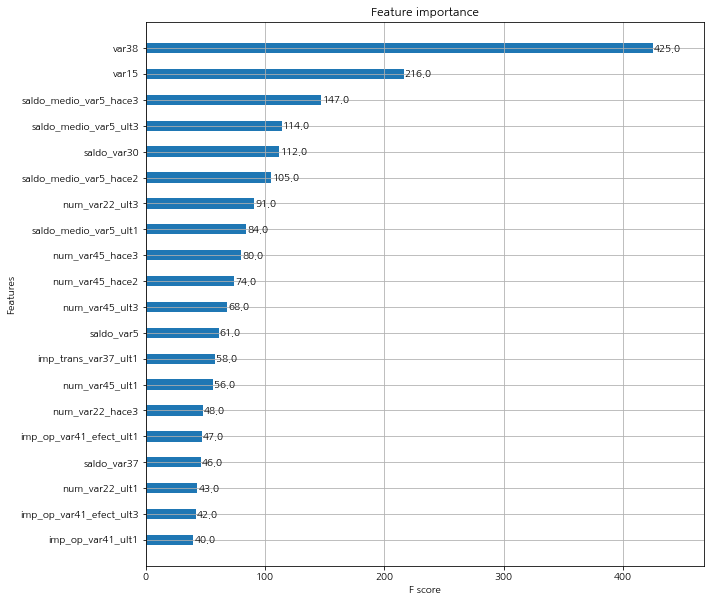

In [36]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
fig , ax = plt.subplots(1, 1, figsize = (10, 10))
plot_importance(xgb_clf, max_num_features= 20, ax = ax, height = 0.4)

0    0.960438
1    0.039562
Name: TARGET, dtype: float64

0    0.960405
1    0.039595
Name: TARGET, dtype: float64
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] 

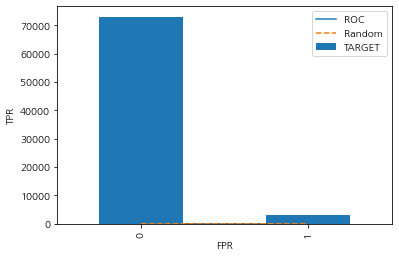

In [48]:
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle

# There are no missing values in this dataset, it looks like that Santander 
# already cleaned and preprocessed the data.
# df.shape = (76020, 370)
df = pd.read_csv(DATA_PATH + "santander_train.csv", encoding='latin-1')

df.head()
# df.info()
# df.describe()
# df['TARGET'].value_counts()
# df['var3'].value_counts()

# target의 분포를 확인한다.
df['TARGET'].value_counts().plot.bar()

# 'var3' feature의 -999999를 2로 치환하고, 'ID' feature는 drop한다.
df['var3'].replace(-999999, 2, inplace=True)
df.drop('ID', axis = 1, inplace=True)

# 피처와 레이블 세트를 분리하고, 학습/평가/시험 데이터를 생성한다.
x_feat = df.drop('TARGET', axis=1)
y_target = df['TARGET']

x_train, x_test, y_train, y_test = train_test_split(x_feat, y_target, test_size = 0.2, stratify=y_target)

# 레이블 분포가 고른지 확인한다. 고르지 않다. accuracy로 평가하는 것보다 ROC-AUC로 평가하는 것이 적합하다.
print(y_train.value_counts() / len(y_train))
print()
print(y_test.value_counts() / len(y_test))

# 모델 생성
model = LGBMClassifier(n_estimators = 100, boosting="goss", top_rate=0.2, other_rate=0.1, is_unbalance = True)

# 학습
params = {'max_depth' : [20, 30, 50, 100]}

# cv가 integer이면 StratifiedKFold로 동작한다. target의 분포가 매우 불균형하기 때문에 stratified가 필요하다.
# Document 내용 : For integer/None inputs, if the estimator is a classifier and y is either binary or 
# multiclass, StratifiedKFold is used.
grid = GridSearchCV(model, param_grid = params, cv = 3, scoring ="roc_auc")
grid.fit(x_train, y_train)

print('GridSearchCV 최적 파라메터 :', grid.best_params_)

# 평가 (AUC)
y_pred = grid.predict_proba(x_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)

print("ROC AUC = {0:.4f}".format(auc))

# ROC curve를 그린다
fprs, tprs, thresholds = roc_curve(y_test, y_pred)

plt.plot(fprs, tprs, label = 'ROC')
plt.plot([0,1], [0,1], '--', label = 'Random')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()